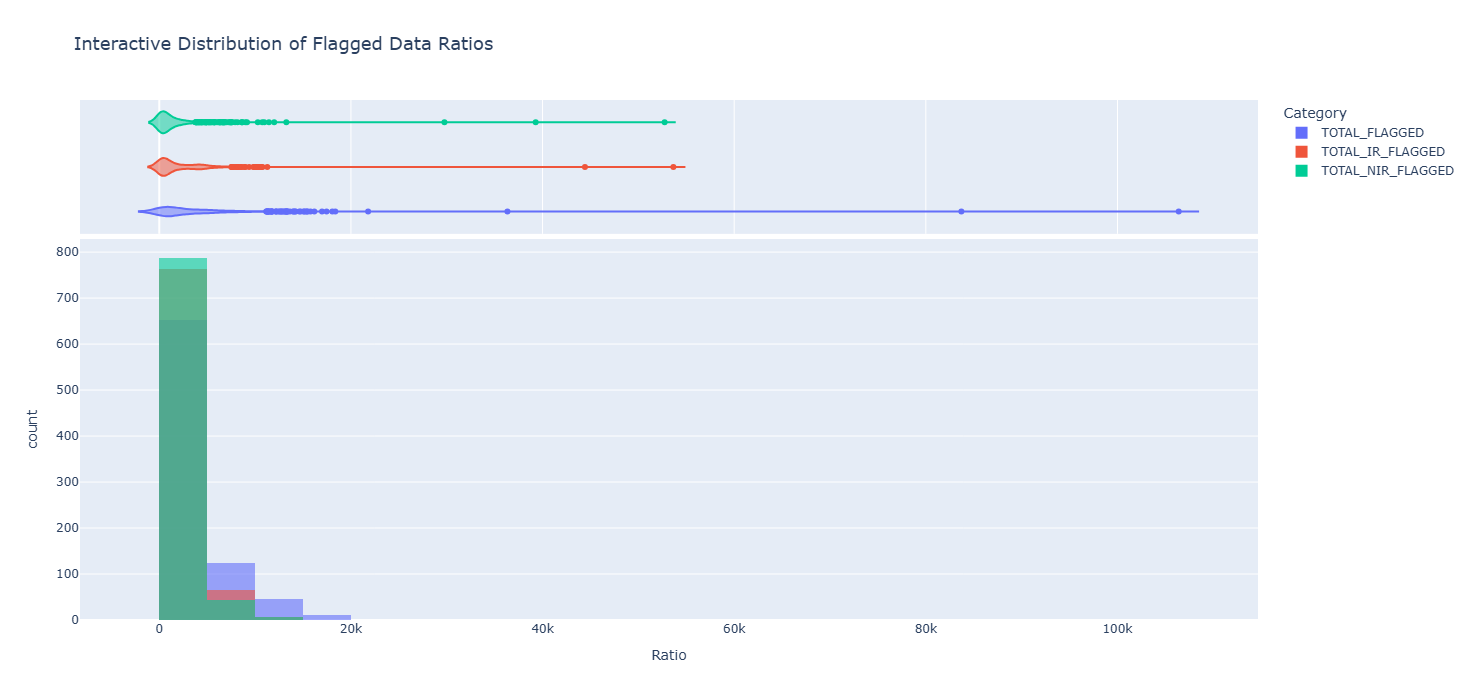

In [7]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Define columns to plot
columns_to_plot = ["TOTAL_FLAGGED", "TOTAL_IR_FLAGGED", "TOTAL_NIR_FLAGGED"]

# Melt DataFrame to long format for Plotly
df_long = df[columns_to_plot].melt(var_name="Category", value_name="Ratio")

# Create interactive histogram with density estimation (KDE)
fig = px.histogram(
    df_long, 
    x="Ratio", 
    color="Category", 
    marginal="violin",  # Adds density plot on the side
    opacity=0.6, 
    barmode="overlay",  # Overlay bars for better comparison
    nbins=30,  
    title="Interactive Distribution of Flagged Data Ratios"
)

fig.update_layout(
    width=1200,  # Increase width
    height=700,  # Increase height
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)
fig.show()

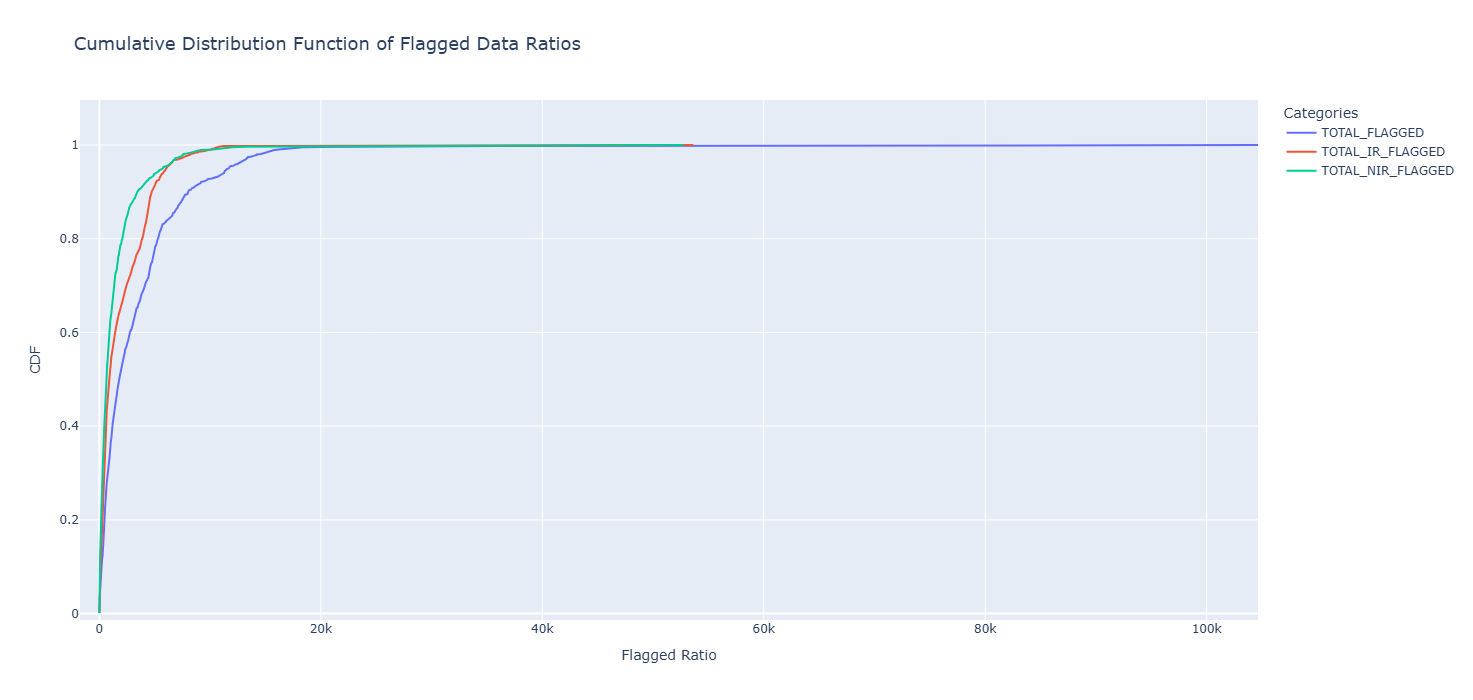

In [10]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Define columns to plot
columns_to_plot = ["TOTAL_FLAGGED", "TOTAL_IR_FLAGGED", "TOTAL_NIR_FLAGGED"]

# Create a CDF for each category
fig = go.Figure()

for column in columns_to_plot:
    # Sort the data for the CDF calculation
    sorted_data = sorted(df[column].dropna())  # Remove NaN values
    cdf_y = [i / len(sorted_data) for i in range(1, len(sorted_data) + 1)]  # Calculate CDF values

    # Add line to the figure
    fig.add_trace(go.Scatter(
        x=sorted_data, 
        y=cdf_y, 
        mode='lines', 
        name=column  # Name the line based on the column
    ))

# Update layout for better visibility
fig.update_layout(
    width=1200,  
    height=700,  
    title="Cumulative Distribution Function of Flagged Data Ratios",
    title_font_size=18,
    xaxis_title="Flagged Ratio",
    yaxis_title="CDF",
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title="Categories"
)

# Show the plot
fig.show()

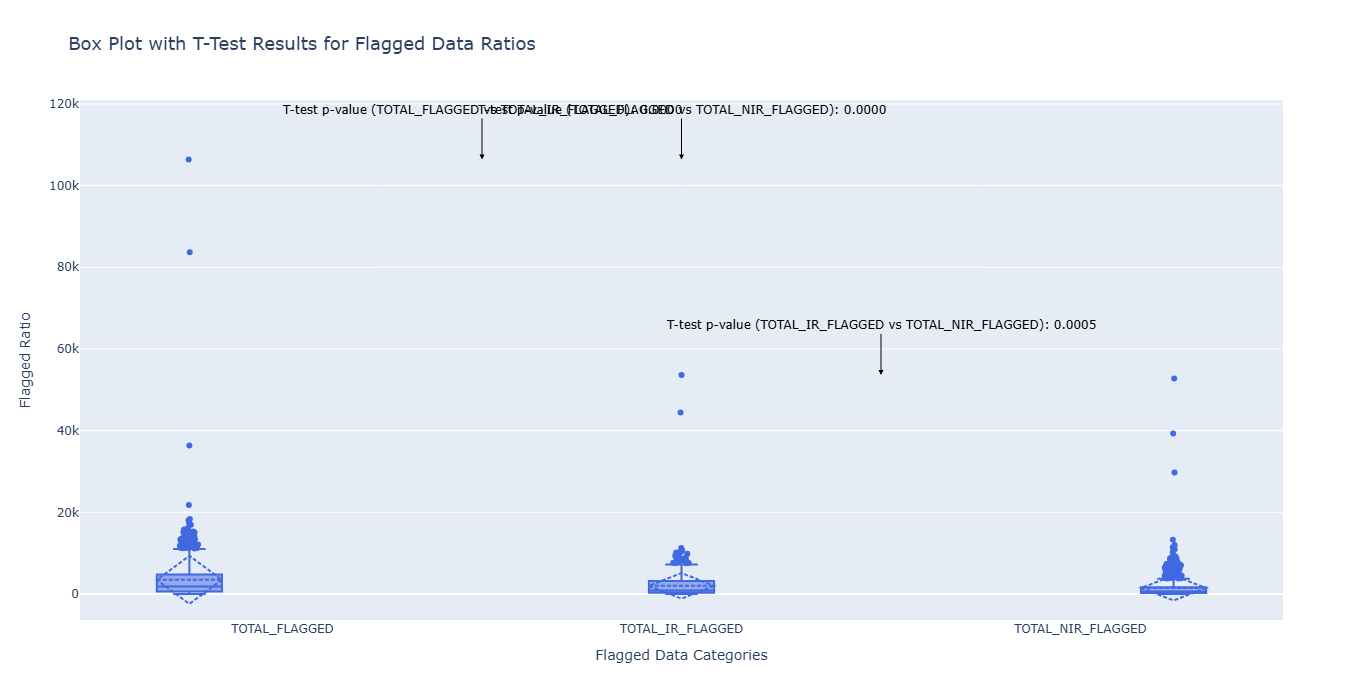

T-test p-value between TOTAL_FLAGGED and TOTAL_IR_FLAGGED: 0.0000
T-test p-value between TOTAL_FLAGGED and TOTAL_NIR_FLAGGED: 0.0000
T-test p-value between TOTAL_IR_FLAGGED and TOTAL_NIR_FLAGGED: 0.0005


In [11]:
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import ttest_ind

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Define columns to plot
columns_to_plot = ["TOTAL_FLAGGED", "TOTAL_IR_FLAGGED", "TOTAL_NIR_FLAGGED"]

# Perform pairwise T-tests between columns
t_test_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        # Remove NaN values for the T-test
        data1 = df[col1].dropna()
        data2 = df[col2].dropna()
        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # Welch's T-test
        t_test_results[(col1, col2)] = p_value

# Create a box plot for the three columns
fig = go.Figure()

# Add box plots for each column
for column in columns_to_plot:
    fig.add_trace(go.Box(
        y=df[column], 
        name=column, 
        boxmean='sd',  # Show the mean and standard deviation
        jitter=0.3,
        marker=dict(color="royalblue")
    ))

# Add annotations for T-test results
for (col1, col2), p_value in t_test_results.items():
    fig.add_annotation(
        x=(columns_to_plot.index(col1) + columns_to_plot.index(col2)) / 2, 
        y=max(df[col1].max(), df[col2].max()) + 0.05,  # Place the annotation above the max y value
        text=f"T-test p-value ({col1} vs {col2}): {p_value:.4f}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-50,
        font=dict(size=12, color="black"),
        arrowcolor="black"
    )

# Update layout for better visibility
fig.update_layout(
    width=1200,  
    height=700,  
    title="Box Plot with T-Test Results for Flagged Data Ratios",
    title_font_size=18,
    xaxis_title="Flagged Data Categories",
    yaxis_title="Flagged Ratio",
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    boxmode='group',  # Group boxes by category
    showlegend=False
)

# Show the plot
fig.show()

# Print the T-test results in the console
for (col1, col2), p_value in t_test_results.items():
    print(f"T-test p-value between {col1} and {col2}: {p_value:.4f}")

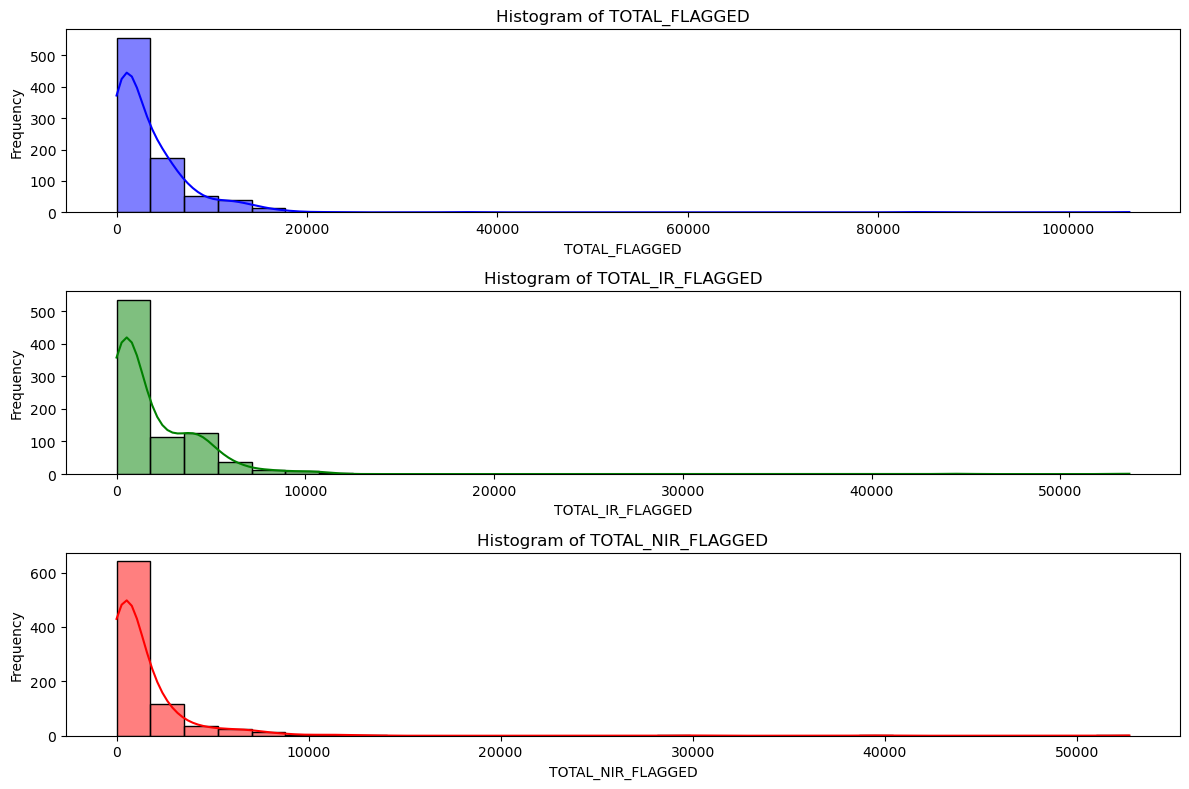

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for the columns
plt.figure(figsize=(12, 8))

# Plot histogram for TOTAL_FLAGGED
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.histplot(df['TOTAL_FLAGGED'], kde=True, color='blue', bins=30)
plt.title('Histogram of TOTAL_FLAGGED')
plt.xlabel('TOTAL_FLAGGED')
plt.ylabel('Frequency')

# Plot histogram for TOTAL_IR_FLAGGED
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
sns.histplot(df['TOTAL_IR_FLAGGED'], kde=True, color='green', bins=30)
plt.title('Histogram of TOTAL_IR_FLAGGED')
plt.xlabel('TOTAL_IR_FLAGGED')
plt.ylabel('Frequency')

# Plot histogram for TOTAL_NIR_FLAGGED
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
sns.histplot(df['TOTAL_NIR_FLAGGED'], kde=True, color='red', bins=30)
plt.title('Histogram of TOTAL_NIR_FLAGGED')
plt.xlabel('TOTAL_NIR_FLAGGED')
plt.ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import pandas as pd

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"
df = pd.read_csv(file_path)

# Ensure the columns are integers and handle NaN values
df['TOTAL_FLAGGED'] = df['TOTAL_FLAGGED'].fillna(0).astype(int)
df['TOTAL_IR_FLAGGED'] = df['TOTAL_IR_FLAGGED'].fillna(0).astype(int)
df['TOTAL_NIR_FLAGGED'] = df['TOTAL_NIR_FLAGGED'].fillna(0).astype(int)

df['TOTAL_NO_FLAG'] = df['TOTAL_NO_FLAG'].fillna(0).astype(int)
df['TOTAL_IR_NO_FLAG'] = df['TOTAL_IR_NO_FLAG'].fillna(0).astype(int)
df['TOTAL_NIR_NO_FLAG'] = df['TOTAL_NIR_NO_FLAG'].fillna(0).astype(int)

# Step 1: Calculate Flagged and Not Flagged Counts for Total, Irrigation, and Non-Irrigation
# Total group
total_flagged = df['TOTAL_FLAGGED'].sum()
total_no_flag = df['TOTAL_NO_FLAG'].sum()

# Irrigation group
irrigation_flagged = df['TOTAL_IR_FLAGGED'].sum()
irrigation_no_flag = df['TOTAL_IR_NO_FLAG'].sum()

# Non-Irrigation group
nirrigation_flagged = df['TOTAL_NIR_FLAGGED'].sum()
nirrigation_no_flag = df['TOTAL_NIR_NO_FLAG'].sum()

# Step 2: Helper function to calculate Relative Risk and Odds Ratio
def calculate_rr_or(flagged_a, no_flag_a, flagged_b, no_flag_b):
    # Risk in group A and group B
    risk_a = flagged_a / (flagged_a + no_flag_a)
    risk_b = flagged_b / (flagged_b + no_flag_b)

    # Relative Risk (Risk Ratio)
    rr = risk_a / risk_b if risk_b > 0 else np.inf  # Avoid division by zero

    # Odds in group A and group B
    odds_a = flagged_a / no_flag_a if no_flag_a > 0 else np.inf
    odds_b = flagged_b / no_flag_b if no_flag_b > 0 else np.inf

    # Odds Ratio
    or_ = odds_a / odds_b if odds_b > 0 else np.inf  # Avoid division by zero

    return rr, or_

# Step 3: Calculate Relative Risk and Odds Ratio for Total vs Irrigation, Total vs Non-Irrigation, and Irrigation vs Non-Irrigation
# Relative Risk and Odds Ratio: Total vs Irrigation
rr_total_vs_irrigation, or_total_vs_irrigation = calculate_rr_or(
    irrigation_flagged, irrigation_no_flag, total_flagged, total_no_flag
)

# Relative Risk and Odds Ratio: Total vs Non-Irrigation
rr_total_vs_nirrigation, or_total_vs_nirrigation = calculate_rr_or(
    nirrigation_flagged, nirrigation_no_flag, total_flagged, total_no_flag
)

# Relative Risk and Odds Ratio: Irrigation vs Non-Irrigation
rr_irrigation_vs_nirrigation, or_irrigation_vs_nirrigation = calculate_rr_or(
    irrigation_flagged, irrigation_no_flag, nirrigation_flagged, nirrigation_no_flag
)

# Step 4: Display Results
print(f"Relative Risk (Total vs Irrigation): {rr_total_vs_irrigation}")
print(f"Odds Ratio (Total vs Irrigation): {or_total_vs_irrigation}")
print(f"Relative Risk (Total vs Non-Irrigation): {rr_total_vs_nirrigation}")
print(f"Odds Ratio (Total vs Non-Irrigation): {or_total_vs_nirrigation}")
print(f"Relative Risk (Irrigation vs Non-Irrigation): {rr_irrigation_vs_nirrigation}")
print(f"Odds Ratio (Irrigation vs Non-Irrigation): {or_irrigation_vs_nirrigation}")

Relative Risk (Total vs Irrigation): 0.9635502227624703
Odds Ratio (Total vs Irrigation): 0.9390787376985441
Relative Risk (Total vs Non-Irrigation): 1.0541705889775208
Odds Ratio (Total vs Non-Irrigation): 1.0966415098615674
Relative Risk (Irrigation vs Non-Irrigation): 0.9140363360896394
Odds Ratio (Irrigation vs Non-Irrigation): 0.8563224438012447


           Column 1            Column 2  Chi-Square Statistic       P-Value  \
0    TOTAL_NEGATIVE          TOTAL_ZERO              1.528894  2.162785e-01   
1    TOTAL_NEGATIVE          TOTAL_95th              0.124814  7.238706e-01   
2    TOTAL_NEGATIVE           TOTAL_IQR              2.215200  1.366573e-01   
3    TOTAL_NEGATIVE           TOTAL_RoC              1.281645  2.575935e-01   
4    TOTAL_NEGATIVE      TOTAL_REPEATED              1.183785  2.765869e-01   
..              ...                 ...                   ...           ...   
547   TOTAL_NIR_RSD      TOTAL_NIR_95th             97.936940  4.319206e-23   
548   TOTAL_NIR_RSD       TOTAL_NIR_IQR            104.394365  1.658014e-24   
549   TOTAL_NIR_RSD       TOTAL_NIR_RoC            272.996237  2.522932e-61   
550   TOTAL_NIR_RSD  TOTAL_NIR_REPEATED             10.306078  1.325927e-03   
551   TOTAL_NIR_RSD        TOTAL_NIR_IF             24.827577  6.269411e-07   

     Degrees of Freedom                            

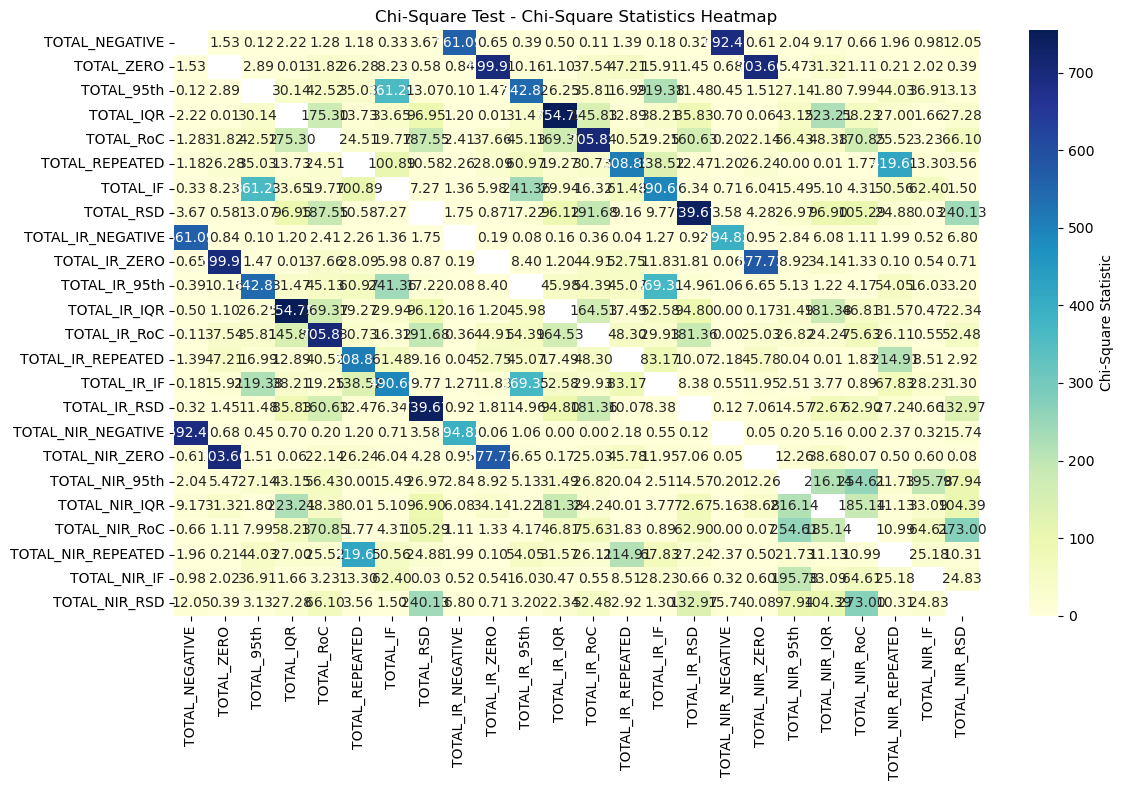

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the data (adjust the path to your file)
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"
df = pd.read_csv(file_path)

# Define the flag columns (adjust based on your dataset)
flag_columns = ['TOTAL_NEGATIVE', 'TOTAL_ZERO', 'TOTAL_95th', 'TOTAL_IQR', 'TOTAL_RoC', 'TOTAL_REPEATED', 
                'TOTAL_IF', 'TOTAL_RSD', 'TOTAL_IR_NEGATIVE', 'TOTAL_IR_ZERO', 'TOTAL_IR_95th', 'TOTAL_IR_IQR', 
                'TOTAL_IR_RoC', 'TOTAL_IR_REPEATED', 'TOTAL_IR_IF', 'TOTAL_IR_RSD', 'TOTAL_NIR_NEGATIVE', 
                'TOTAL_NIR_ZERO', 'TOTAL_NIR_95th', 'TOTAL_NIR_IQR', 'TOTAL_NIR_RoC', 'TOTAL_NIR_REPEATED', 
                'TOTAL_NIR_IF', 'TOTAL_NIR_RSD']

# Clean the data by removing rows with missing values in the flag columns
df_clean = df.dropna(subset=flag_columns)

# Convert flag columns to categorical values (0 or 1, False or True)
for col in flag_columns:
    df_clean[col] = df_clean[col].apply(lambda x: 1 if x > 0 else 0)

# Initialize a dictionary to store the results
results = {
    "Column 1": [],
    "Column 2": [],
    "Chi-Square Statistic": [],
    "P-Value": [],
    "Degrees of Freedom": [],
    "Expected Frequencies": []
}

# Loop through each pair of flag columns and perform the Chi-Square test
for col1 in flag_columns:
    for col2 in flag_columns:
        if col1 != col2:  # Avoid comparing the same column with itself
            # Create a contingency table for the two columns
            contingency_table = pd.crosstab(df_clean[col1], df_clean[col2])

            # Perform the Chi-Square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Append the results to the dictionary
            results["Column 1"].append(col1)
            results["Column 2"].append(col2)
            results["Chi-Square Statistic"].append(chi2)
            results["P-Value"].append(p_value)
            results["Degrees of Freedom"].append(dof)
            results["Expected Frequencies"].append(str(expected))

# Convert the results dictionary to a DataFrame
summary_df = pd.DataFrame(results)

# Display the summary table
print(summary_df)

# Visualization: Plotting the Chi-Square statistics or p-values as a heatmap
# Create a matrix of p-values or chi-square statistics for visualization
chi2_matrix = pd.DataFrame(index=flag_columns, columns=flag_columns)

# Fill the matrix with Chi-Square statistics (or p-values)
for col1 in flag_columns:
    for col2 in flag_columns:
        if col1 != col2:
            # Create a contingency table for the two columns
            contingency_table = pd.crosstab(df_clean[col1], df_clean[col2])
            
            # Perform the Chi-Square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Store the Chi-Square statistic or p-value in the matrix
            chi2_matrix.loc[col1, col2] = chi2  # Or use p_value instead of chi2

# Plot a heatmap of the Chi-Square statistics
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_matrix.astype(float), annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Chi-Square Statistic'})
plt.title("Chi-Square Test - Chi-Square Statistics Heatmap")
plt.tight_layout()
plt.show()

TOTAL_FLAGGED vs TOTAL_IR_FLAGGED:
  KS Statistic: 0.1799761620977354
  P-value: 2.7609552335953546e-12
  The distributions are significantly different.


TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED:
  KS Statistic: 0.2800953516090584
  P-value: 2.2203690289635216e-29
  The distributions are significantly different.


TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED:
  KS Statistic: 0.15137067938021453
  P-value: 8.413410072597204e-09
  The distributions are significantly different.




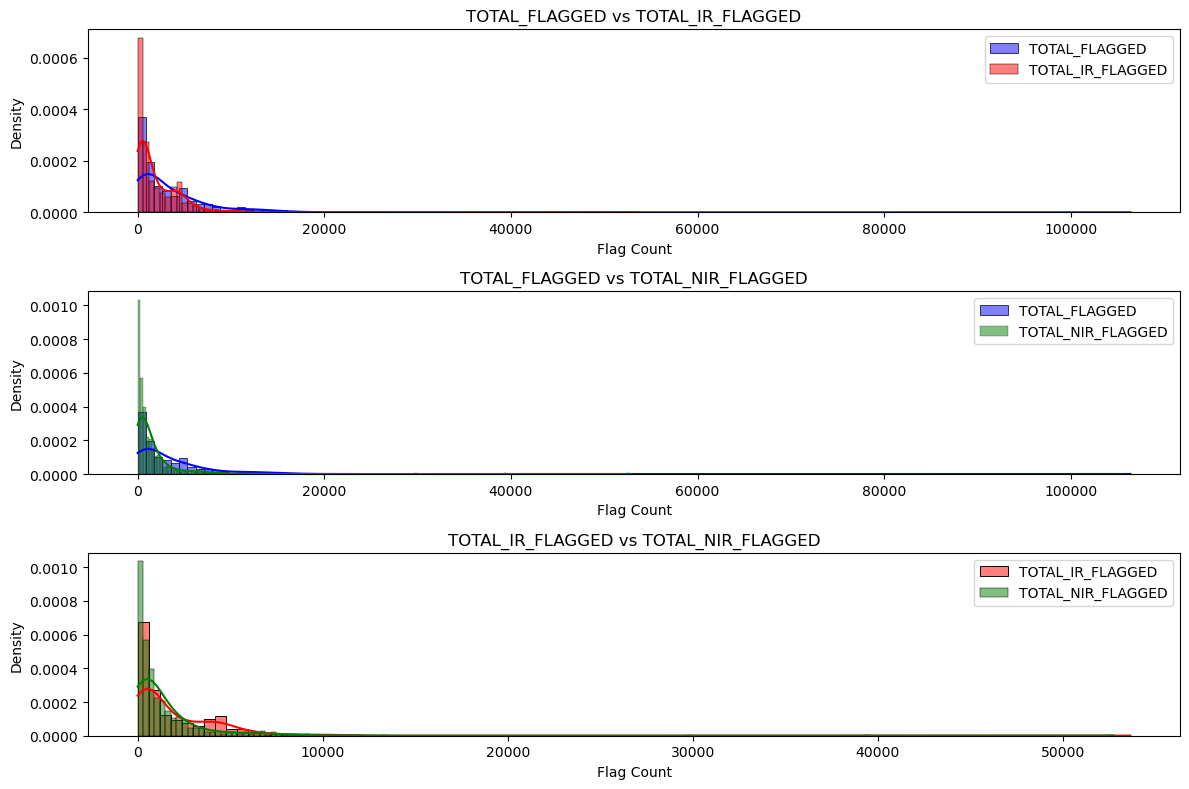

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"
df = pd.read_csv(file_path)

# Ensure the columns contain non-negative integers and there are no NaN values
df['TOTAL_FLAGGED'] = df['TOTAL_FLAGGED'].fillna(0).astype(int)
df['TOTAL_IR_FLAGGED'] = df['TOTAL_IR_FLAGGED'].fillna(0).astype(int)
df['TOTAL_NIR_FLAGGED'] = df['TOTAL_NIR_FLAGGED'].fillna(0).astype(int)

# Perform the Kolmogorov-Smirnov tests for each pair
ks_results = {}

# Test 1: TOTAL_FLAGGED vs TOTAL_IR_FLAGGED
ks_stat_1, ks_p_value_1 = stats.ks_2samp(df['TOTAL_FLAGGED'], df['TOTAL_IR_FLAGGED'])
ks_results['TOTAL_FLAGGED vs TOTAL_IR_FLAGGED'] = (ks_stat_1, ks_p_value_1)

# Test 2: TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED
ks_stat_2, ks_p_value_2 = stats.ks_2samp(df['TOTAL_FLAGGED'], df['TOTAL_NIR_FLAGGED'])
ks_results['TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED'] = (ks_stat_2, ks_p_value_2)

# Test 3: TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED
ks_stat_3, ks_p_value_3 = stats.ks_2samp(df['TOTAL_IR_FLAGGED'], df['TOTAL_NIR_FLAGGED'])
ks_results['TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED'] = (ks_stat_3, ks_p_value_3)

# Print the KS test results for all three tests
for test, result in ks_results.items():
    ks_stat, ks_p_value = result
    print(f"{test}:")
    print(f"  KS Statistic: {ks_stat}")
    print(f"  P-value: {ks_p_value}")
    if ks_p_value < 0.05:
        print("  The distributions are significantly different.")
    else:
        print("  The distributions are not significantly different.")
    print("\n")

# Optionally, plot the distributions of all three pairs
plt.figure(figsize=(12, 8))

# Plot for TOTAL_FLAGGED vs TOTAL_IR_FLAGGED
plt.subplot(3, 1, 1)
sns.histplot(df['TOTAL_FLAGGED'], color='blue', label='TOTAL_FLAGGED', kde=True, stat='density')
sns.histplot(df['TOTAL_IR_FLAGGED'], color='red', label='TOTAL_IR_FLAGGED', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_FLAGGED vs TOTAL_IR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('Density')

# Plot for TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED
plt.subplot(3, 1, 2)
sns.histplot(df['TOTAL_FLAGGED'], color='blue', label='TOTAL_FLAGGED', kde=True, stat='density')
sns.histplot(df['TOTAL_NIR_FLAGGED'], color='green', label='TOTAL_NIR_FLAGGED', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('Density')

# Plot for TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED
plt.subplot(3, 1, 3)
sns.histplot(df['TOTAL_IR_FLAGGED'], color='red', label='TOTAL_IR_FLAGGED', kde=True, stat='density')
sns.histplot(df['TOTAL_NIR_FLAGGED'], color='green', label='TOTAL_NIR_FLAGGED', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

KS Test 1: TOTAL_FLAGGED vs TOTAL_IR_FLAGGED
  KS Statistic: 0.1799761620977354
  P-value: 2.7609552335953546e-12
  The distributions are significantly different.


KS Test 2: TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED
  KS Statistic: 0.2800953516090584
  P-value: 2.2203690289635216e-29
  The distributions are significantly different.


KS Test 3: TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED
  KS Statistic: 0.15137067938021453
  P-value: 8.413410072597204e-09
  The distributions are significantly different.


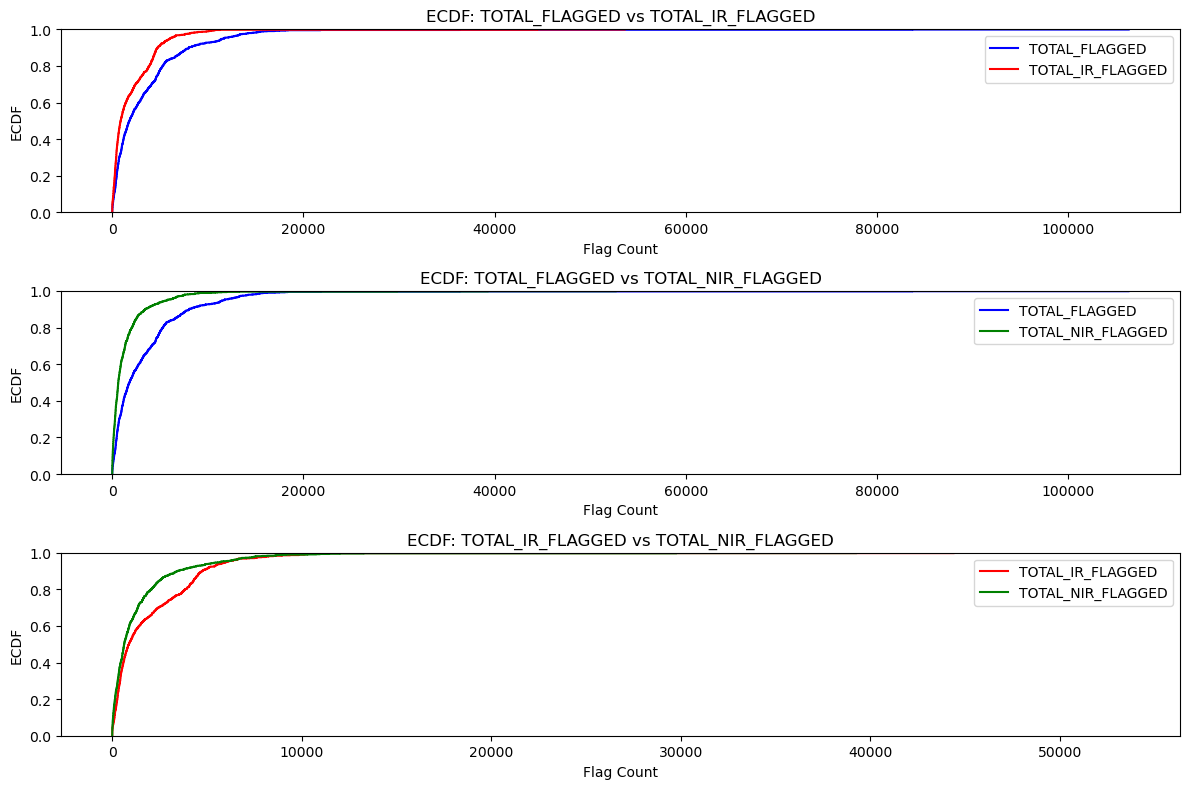

In [34]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"
df = pd.read_csv(file_path)

# Ensure the columns contain non-negative integers and there are no NaN values
df['TOTAL_FLAGGED'] = df['TOTAL_FLAGGED'].fillna(0).astype(int)
df['TOTAL_IR_FLAGGED'] = df['TOTAL_IR_FLAGGED'].fillna(0).astype(int)
df['TOTAL_NIR_FLAGGED'] = df['TOTAL_NIR_FLAGGED'].fillna(0).astype(int)

# Perform the Kolmogorov-Smirnov test for three pairs
ks_stat_1, ks_p_value_1 = stats.ks_2samp(df['TOTAL_FLAGGED'], df['TOTAL_IR_FLAGGED'])
ks_stat_2, ks_p_value_2 = stats.ks_2samp(df['TOTAL_FLAGGED'], df['TOTAL_NIR_FLAGGED'])
ks_stat_3, ks_p_value_3 = stats.ks_2samp(df['TOTAL_IR_FLAGGED'], df['TOTAL_NIR_FLAGGED'])

# Print the results for each test
print(f"KS Test 1: TOTAL_FLAGGED vs TOTAL_IR_FLAGGED")
print(f"  KS Statistic: {ks_stat_1}")
print(f"  P-value: {ks_p_value_1}")
if ks_p_value_1 < 0.05:
    print("  The distributions are significantly different.")
else:
    print("  The distributions are not significantly different.")

print("\n")

print(f"KS Test 2: TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED")
print(f"  KS Statistic: {ks_stat_2}")
print(f"  P-value: {ks_p_value_2}")
if ks_p_value_2 < 0.05:
    print("  The distributions are significantly different.")
else:
    print("  The distributions are not significantly different.")

print("\n")

print(f"KS Test 3: TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED")
print(f"  KS Statistic: {ks_stat_3}")
print(f"  P-value: {ks_p_value_3}")
if ks_p_value_3 < 0.05:
    print("  The distributions are significantly different.")
else:
    print("  The distributions are not significantly different.")

# Plot the ECDFs for each pair of columns being compared

plt.figure(figsize=(12, 8))

# Plot for TOTAL_FLAGGED vs TOTAL_IR_FLAGGED
plt.subplot(3, 1, 1)
sns.ecdfplot(df['TOTAL_FLAGGED'], color='blue', label='TOTAL_FLAGGED', stat='proportion')
sns.ecdfplot(df['TOTAL_IR_FLAGGED'], color='red', label='TOTAL_IR_FLAGGED', stat='proportion')
plt.legend()
plt.title('ECDF: TOTAL_FLAGGED vs TOTAL_IR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('ECDF')

# Plot for TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED
plt.subplot(3, 1, 2)
sns.ecdfplot(df['TOTAL_FLAGGED'], color='blue', label='TOTAL_FLAGGED', stat='proportion')
sns.ecdfplot(df['TOTAL_NIR_FLAGGED'], color='green', label='TOTAL_NIR_FLAGGED', stat='proportion')
plt.legend()
plt.title('ECDF: TOTAL_FLAGGED vs TOTAL_NIR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('ECDF')

# Plot for TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED
plt.subplot(3, 1, 3)
sns.ecdfplot(df['TOTAL_IR_FLAGGED'], color='red', label='TOTAL_IR_FLAGGED', stat='proportion')
sns.ecdfplot(df['TOTAL_NIR_FLAGGED'], color='green', label='TOTAL_NIR_FLAGGED', stat='proportion')
plt.legend()
plt.title('ECDF: TOTAL_IR_FLAGGED vs TOTAL_NIR_FLAGGED')
plt.xlabel('Flag Count')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

TOTAL_FLAGGED_RATIO vs TOTAL_IR_FLAGGED_RATIO:
  KS Statistic: 0.10250297973778308
  P-value: 0.0002938820724191077
  The distributions are significantly different.


TOTAL_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO:
  KS Statistic: 0.16924910607866508
  P-value: 6.597299739255332e-11
  The distributions are significantly different.


TOTAL_IR_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO:
  KS Statistic: 0.20858164481525626
  P-value: 2.19363424910554e-16
  The distributions are significantly different.




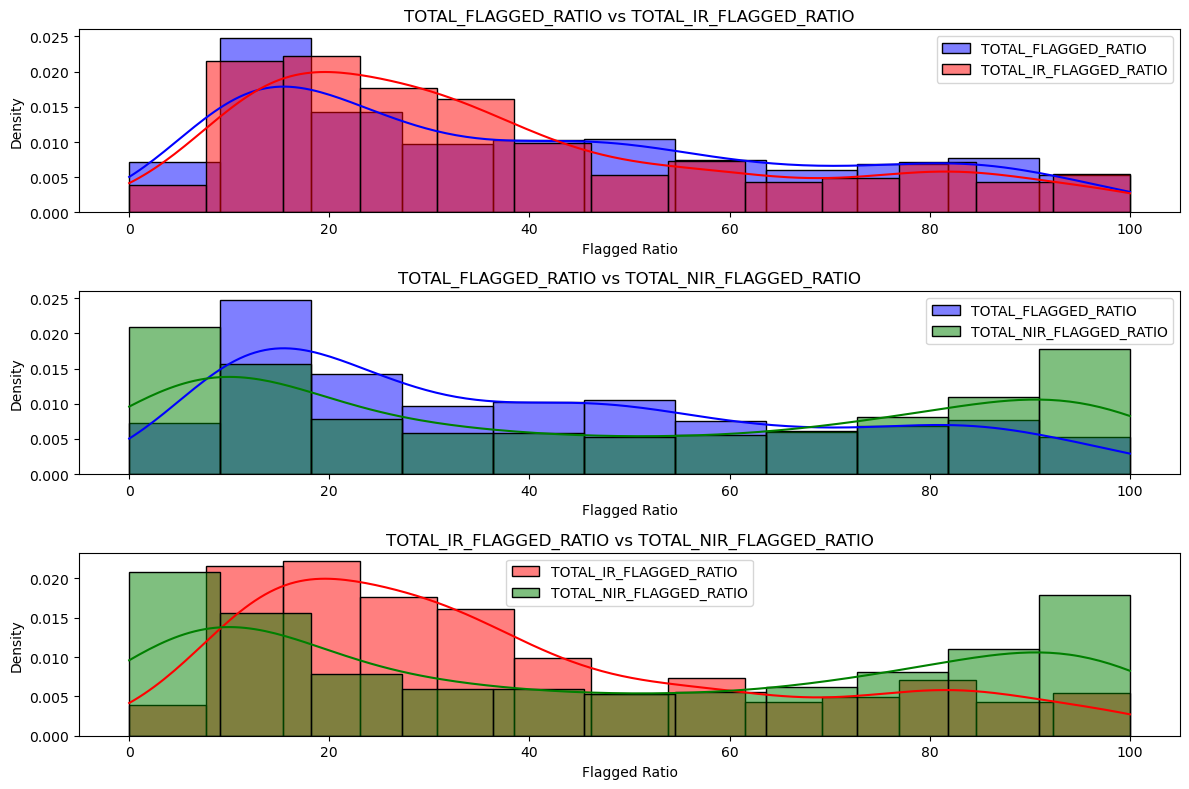

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "merged_seasonal_flagging_dvrt_data_840_stations_results_20250409.csv"
df = pd.read_csv(file_path)

# Convert non-numeric values (like "#DIV/0!") to NaN, then fill with 0
df['TOTAL_FLAGGED_RATIO'] = pd.to_numeric(df['TOTAL_FLAGGED_RATIO'], errors='coerce').fillna(0).astype(float)
df['TOTAL_IR_FLAGGED_RATIO'] = pd.to_numeric(df['TOTAL_IR_FLAGGED_RATIO'], errors='coerce').fillna(0).astype(float)
df['TOTAL_NIR_FLAGGED_RATIO'] = pd.to_numeric(df['TOTAL_NIR_FLAGGED_RATIO'], errors='coerce').fillna(0).astype(float)

# Perform the Kolmogorov-Smirnov tests for each pair
ks_results = {}

# Test 1: TOTAL_FLAGGED_RATIO vs TOTAL_IR_FLAGGED_RATIO
ks_stat_1, ks_p_value_1 = stats.ks_2samp(df['TOTAL_FLAGGED_RATIO'], df['TOTAL_IR_FLAGGED_RATIO'])
ks_results['TOTAL_FLAGGED_RATIO vs TOTAL_IR_FLAGGED_RATIO'] = (ks_stat_1, ks_p_value_1)

# Test 2: TOTAL_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO
ks_stat_2, ks_p_value_2 = stats.ks_2samp(df['TOTAL_FLAGGED_RATIO'], df['TOTAL_NIR_FLAGGED_RATIO'])
ks_results['TOTAL_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO'] = (ks_stat_2, ks_p_value_2)

# Test 3: TOTAL_IR_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO
ks_stat_3, ks_p_value_3 = stats.ks_2samp(df['TOTAL_IR_FLAGGED_RATIO'], df['TOTAL_NIR_FLAGGED_RATIO'])
ks_results['TOTAL_IR_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO'] = (ks_stat_3, ks_p_value_3)

# Print the KS test results for all three tests
for test, result in ks_results.items():
    ks_stat, ks_p_value = result
    print(f"{test}:")
    print(f"  KS Statistic: {ks_stat}")
    print(f"  P-value: {ks_p_value}")
    if ks_p_value < 0.05:
        print("  The distributions are significantly different.")
    else:
        print("  The distributions are not significantly different.")
    print("\n")

# Optionally, plot the distributions of all three pairs
plt.figure(figsize=(12, 8))

# Plot for TOTAL_FLAGGED_RATIO vs TOTAL_IR_FLAGGED_RATIO
plt.subplot(3, 1, 1)
sns.histplot(df['TOTAL_FLAGGED_RATIO'], color='blue', label='TOTAL_FLAGGED_RATIO', kde=True, stat='density')
sns.histplot(df['TOTAL_IR_FLAGGED_RATIO'], color='red', label='TOTAL_IR_FLAGGED_RATIO', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_FLAGGED_RATIO vs TOTAL_IR_FLAGGED_RATIO')
plt.xlabel('Flagged Ratio')
plt.ylabel('Density')

# Plot for TOTAL_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO
plt.subplot(3, 1, 2)
sns.histplot(df['TOTAL_FLAGGED_RATIO'], color='blue', label='TOTAL_FLAGGED_RATIO', kde=True, stat='density')
sns.histplot(df['TOTAL_NIR_FLAGGED_RATIO'], color='green', label='TOTAL_NIR_FLAGGED_RATIO', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO')
plt.xlabel('Flagged Ratio')
plt.ylabel('Density')

# Plot for TOTAL_IR_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO
plt.subplot(3, 1, 3)
sns.histplot(df['TOTAL_IR_FLAGGED_RATIO'], color='red', label='TOTAL_IR_FLAGGED_RATIO', kde=True, stat='density')
sns.histplot(df['TOTAL_NIR_FLAGGED_RATIO'], color='green', label='TOTAL_NIR_FLAGGED_RATIO', kde=True, stat='density')
plt.legend()
plt.title('TOTAL_IR_FLAGGED_RATIO vs TOTAL_NIR_FLAGGED_RATIO')
plt.xlabel('Flagged Ratio')
plt.ylabel('Density')

plt.tight_layout()
plt.show()